# Installing dependecies

In [ ]:
# install hmmer library
!sudo apt-get install hmmer
!sudo apt-get install hmmer-doc
!sudo apt-get install ncbi-blast+

In [105]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the 3D structure
CSV files of PF00014 domains are based on two different queries.

```
( Identifier = "PF00014" AND Annotation Type = "Pfam" ) AND Data Collection Resolution < 3 AND Polymer Entity Sequence Length = [ 50 - 80 ] AND Polymer Entity Mutation Count < 10
```
and
```
 ( Identifier = "PF00014" AND Annotation Type = "Pfam" ) AND Data Collection Resolution < 2 AND Polymer Entity Sequence Length = [ 50 - 80 ] AND Polymer Entity Mutation Count < 2
 ```
 the difference are the `Resolution(3Å vs 2Å)`, `Polymer Entity Mutation Count(10 vs 2)` and at the end `grouping the polymer entities with different sequence identity(100% vs 50%)`.

 The stricter criteria, with a resolution of 2Å, a mutation count of less than 2, and a sequence identity of 100%, may lead to a smaller sample size but potentially higher quality data, while the less strict criteria, with a resolution of 3Å, a mutation count of less than 10, and a sequence identity of 50%, could yield a larger sample size but with a risk of including lower quality data. With the stricter rules, we have obtained 14 samples, whereas with the less strict rule, we have collected 28 samples. Additionally, we aim to assess which set of criteria—either the more stringent or the less restrictive—ultimately yields superior results in terms of sample quality and relevance to our research objectives.

Now we can download the tabular CSV files which contain `Entity ID`, `Sequence`, `Auth Asym ID`

In [ ]:
!wget -O strict_seq.csv "https://github.com/heispv/bioinformatics/raw/master/lab-of-bioinformatics/project_files/strict.csv"
!wget -O not_strict_seq.csv "https://github.com/heispv/bioinformatics/raw/master/lab-of-bioinformatics/project_files/not_strict.csv"

# Clean csv file

In [107]:
def clean_csv_file(path: str, output_file_name: str, string_or_file: str = 'f', save_format: str = 'f') -> str or None:
    """
    Reads and cleans a CSV file, providing options to return the cleaned data as a string or save it into a file.

    Parameters:
        path (str): The path to the CSV file to be cleaned.
        output_file_name (str): The name of the output file. Defaults to "output_seq".
        string_or_file (str): Determines whether to return the cleaned data as a string ('s') or save it into a file ('f'). Defaults to 'f'.
        save_format (str): Determines the format for saving the data into a file. For keys ('k') or Fasta format ('f'). Defaults to 'f'.

    Returns:
        str or None: If the user chooses to get the results as a variable ('s'),
        the cleaned data is returned as a string. If the user chooses to save the
        results into a file ('f'), the cleaned data is saved into a file.
    """
    print('-' * 40)
    print(f'Reading CSV file from {path}...')
    df = pd.read_csv(path)
    print(f'Initial number of records: {len(df)}')
    print('-' * 40)

    # Drop rows with missing 'Entity ID' and update 'Entity ID' format
    df = df.dropna(subset=['Entity ID'])
    print(f'Number of records after dropping missing Entity ID: {len(df)}')
    df['Entity ID'] = df['Entity ID'].str.split('_').str[0] + ':' + df['Auth Asym ID']
    df = df.drop(columns=['Auth Asym ID'])
    df = df.reset_index(drop=True)

    # Option to return the cleaned data as a string
    if string_or_file == 's':
        cleaned_data = '\n'.join(df['Entity ID'].values)
        print('-' * 40)
        print('Returning cleaned data as a string.')
        return cleaned_data

    # Option to save the cleaned data to a file
    elif string_or_file == 'f':
        if save_format == 'f':
            output_path = output_file_name + '.fasta'
            with open(output_path, 'w') as file:
                for idx, row in df.iterrows():
                    file.write(f"> {row['Entity ID']}\n{row['Sequence']}\n")
            print(f'Data saved to {output_path}')
        elif save_format == 'k':
            output_path = output_file_name + '.txt'
            with open(output_path, 'w') as f:
                f.write('\n'.join(df['Entity ID'].values))
            print(f'Data saved to {output_path}')
        print('-' * 40)
        return None


Clean the `strict_seq.csv` file.

In [108]:
clean_csv_file(
    path='strict_seq.csv',
    output_file_name='strict_seqs',
    string_or_file='f',
    save_format='f'
    )

----------------------------------------
Reading CSV file from strict_seq.csv...
Initial number of records: 30
----------------------------------------
Number of records after dropping missing Entity ID: 15
Data saved to strict_seqs.fasta
----------------------------------------


Clean the `not_strict_seq.csv` file.

In [109]:
clean_csv_file(
    path='not_strict_seq.csv',
    output_file_name='not_strict_seqs',
    string_or_file='f',
    save_format='f'
    )

----------------------------------------
Reading CSV file from not_strict_seq.csv...
Initial number of records: 49
----------------------------------------
Number of records after dropping missing Entity ID: 28
Data saved to not_strict_seqs.fasta
----------------------------------------


Check the data format.

In [110]:
!cat strict_seqs.fasta | head -n 10

> 1AAP:A
VREVCSEQAETGPCRAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCGSA
> 1KTH:A
ETDICKLPKDEGTCRDFILKWYYDPNTKSCARFWYGGCGGNENKFGSQKECEKVCAPV
> 1ZR0:B
PTGNNAEICLLPLDYGPCRALLLRYYYDRYTQSCRQFLYGGCEGNANNFYTWEACDDACWRIE
> 3BYB:A
KDRPDFCELPADTGPCRVRFPSFYYNPDEKKCLEFIYGGCEGNANNFITKEECESTCAA
> 3M7Q:B
EAEASICSEPKKVGRCKGYFPRFYFDSETGKCTPFIYGGCGGNGNNFETLHQCRAICRALG


We can use the same function which we used to clean the csv file, to only extract the ids of the sequences. These ids are going to be used as input files in the `PDBeFold` website to get `Multiple Seqence Alignment(MSA)` based on `Multiple Structure Alignemt`.

In [111]:
# Get sequence ids as .txt file for the PDBeFold input
clean_csv_file(
    path='strict_seq.csv',
    output_file_name='strict_ids',
    string_or_file='f',
    save_format='k'
    )

----------------------------------------
Reading CSV file from strict_seq.csv...
Initial number of records: 30
----------------------------------------
Number of records after dropping missing Entity ID: 15
Data saved to strict_ids.txt
----------------------------------------


In [112]:
# Get sequence ids as .txt file for the PDBeFold input
clean_csv_file(
    path='not_strict_seq.csv',
    output_file_name='not_strict_ids',
    string_or_file='f',
    save_format='k'
    )

----------------------------------------
Reading CSV file from not_strict_seq.csv...
Initial number of records: 49
----------------------------------------
Number of records after dropping missing Entity ID: 28
Data saved to not_strict_ids.txt
----------------------------------------


Files `strict_ids.txt` and `not_strict_ids.txt` are uploaded into the [PDBeFold](https://www.ebi.ac.uk/msd-srv/ssm/cgi-bin/ssmserver) and the results are saved in my Github repository.

In [113]:
!rm not_strict_seq.csv strict_seq.csv

# Get MSA
As mentioned we can download the PDBeFold results from my Github repo.

In [ ]:
# Getting the multiple sequence alignment from github repo
!wget -O strict_msa.txt "https://github.com/heispv/bioinformatics/raw/master/lab-of-bioinformatics/project_files/strict_msa.txt"

In [ ]:
!wget -O not_strict_msa.txt "https://github.com/heispv/bioinformatics/raw/master/lab-of-bioinformatics/project_files/not_strict_msa.txt"

In [116]:
!rm strict_ids.txt not_strict_ids.txt

# Build HMM based on the raw MSA
Because we selected two approaches to select our data, we should create two different HMMs based on each dataset.

In [117]:
# Create an HMM model based on the strict_msa.txt file
!hmmbuild strict_msa_not_clean.hmm strict_msa.txt

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             strict_msa.txt
# output HMM file:                  strict_msa_not_clean.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     strict_msa              15    63    57     2.35  0.976 

# CPU time: 0.05u 0.00s 00:00:00.05 Elapsed: 00:00:00.07


In [118]:
# Create an HMM model based on the not_strict_msa.txt file
!hmmbuild not_strict_msa_not_clean.hmm not_strict_msa.txt

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             not_strict_msa.txt
# output HMM file:                  not_strict_msa_not_clean.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     not_strict_msa          28    80    59     3.28  0.945 

# CPU time: 0.05u 0.00s 00:00:00.05 Elapsed: 00:00:00.07


In [119]:
!cat strict_msa_not_clean.hmm | head -n 22

HMMER3/f [3.3.2 | Nov 2020]
NAME  strict_msa
LENG  57
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Sun May 19 16:16:10 2024
NSEQ  15
EFFN  2.354736
CKSUM 1225978556
STATS LOCAL MSV       -8.8676  0.71902
STATS LOCAL VITERBI   -9.0620  0.71902
STATS LOCAL FORWARD   -4.0485  0.71902
HMM          A        C        D        E        F        G        H        I        K        L        M        N        P        Q        R        S        T        V        W        Y   
            m->m     m->i     m->d     i->m     i->i     d->m     d->d
  COMPO   2.60263  2.73612  3.07114  2.69296  2.83763  2.63193  3.88604  3.41319  2.66892  3.03622  4.07894  2.70680  3.44272  3.07560  2.87241  2.77771  2.91062  3.13755  4.62504  2.85507
          2.68622  4.42249  2.77475  2.73061  3.46378  2.40519  3.72518  3.29307  2.67748  2.69379  4.24714  2.90341  2.73739  3.18170  2.89777  2.37911  2.77518  2.98542  4.58501  3.61527
          0.72401  0.99536  1.92687  0.72737  0.66006  0.000

In [120]:
!cat not_strict_msa_not_clean.hmm | head -n 22

HMMER3/f [3.3.2 | Nov 2020]
NAME  not_strict_msa
LENG  59
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Sun May 19 16:16:10 2024
NSEQ  28
EFFN  3.284668
CKSUM 1929399890
STATS LOCAL MSV       -8.9836  0.71896
STATS LOCAL VITERBI   -9.1716  0.71896
STATS LOCAL FORWARD   -4.2058  0.71896
HMM          A        C        D        E        F        G        H        I        K        L        M        N        P        Q        R        S        T        V        W        Y   
            m->m     m->i     m->d     i->m     i->i     d->m     d->d
  COMPO   2.66045  2.92817  3.06444  2.66755  2.75405  2.64152  3.84570  3.40036  2.59333  3.03034  4.07046  2.68786  3.42610  3.06466  2.78686  2.80020  2.93294  3.20393  4.59062  2.86329
          2.68661  4.42268  2.77530  2.73007  3.46397  2.40541  3.72365  3.29271  2.67756  2.69368  4.24660  2.90390  2.73730  3.18114  2.89805  2.37919  2.77491  2.98562  4.58371  3.61546
          1.18984  1.11301  1.00195  1.14078  0.38503  0

Based on the files above, we can observe that the `hmmbuild` command, applied to the `strict_msa.txt` file, cuts the first `5` characters in the sequence while when using the `not_strict_msa.txt` it cuts the first `20` character. This action is taken because there are not enough amino acids to build the Hidden Markov Model (HMM) for that part of the sequence. Therefore, we will trim each sequence and then reapply the `hmmbuild` command.

# Clean raw MSA

In [121]:
def clean_msa(path: str, first_clipping_num: int, output_file_name: str) -> None:
    """
    Clean MSA file by removing specified number of characters from the beginning of each sequence.

    Args:
        path (str): Path to the input MSA file.
        first_clipping_num (int): Number of characters to remove from the beginning of each sequence.
        output_file_name (str): Name of the output file.

    Returns:
        None

    This function reads a MSA file, extracts the sequence IDs and sequences, removes the specified
    number of characters from the beginning of each sequence, and writes the cleaned sequences to a new file.
    """
    print('-' * 40)
    print(f'Reading MSA file from {path}...')
    with open(path) as f:
        fastas = f.read().strip().split('\n\n')
    print(f'Number of sequences found: {len(fastas)}')
    print('-' * 40)

    clean_list = []
    for fasta in fastas:
        id = fasta.split()[0]
        sequence = ''.join(fasta.split('\n')[1:])
        clean_list.append((id, sequence))

    print(f'Removing the first {first_clipping_num} characters from each sequence...')
    with open(output_file_name + '.txt', 'w') as f:
        for item in clean_list:
            f.write(f"{item[0]}\n{item[1][first_clipping_num:]}\n")
    print('-' * 40)

    print(f'Output saved in {output_file_name}.txt')
    print('-' * 40)


In [122]:
# Clean the MSA of the strict dataset
clean_msa(
    path='strict_msa.txt',
    first_clipping_num=5,
    output_file_name='clean_strict_msa'
    )

----------------------------------------
Reading MSA file from strict_msa.txt...
Number of sequences found: 15
----------------------------------------
Removing the first 5 characters from each sequence...
----------------------------------------
Output saved in clean_strict_msa.txt
----------------------------------------


In [123]:
# Clean the MSA of the not strict dataset
clean_msa(
    path='not_strict_msa.txt',
    first_clipping_num=20,
    output_file_name='clean_not_strict_msa'
    )

----------------------------------------
Reading MSA file from not_strict_msa.txt...
Number of sequences found: 28
----------------------------------------
Removing the first 20 characters from each sequence...
----------------------------------------
Output saved in clean_not_strict_msa.txt
----------------------------------------


In [124]:
# Check the strict_msa.tx file
!cat clean_strict_msa.txt | head -n 10

>PDB:1aap:A
revcseqaetgpcrAMISRWYFDVTEGKCAPFFYGGCGGNRNNFDTEEYCMAVCg---
>PDB:1kth:A
tdicklpkdegtcrDFILKWYYDPNTKSCARFWYGGCGGNENKFGSQKECEKVCapv-
>PDB:1zr0:B
aeicllpldygpcrALLLRYYYDRYTQSCRQFLYGGCEGNANNFYTWEACDDACwrie
>PDB:3byb:A
pdfcelpadtgpcrVRFPSFYYNPDEKKCLEFIYGGCEGNANNFITKEECESTCa---
>PDB:3m7q:B
asicsepkkvgrckGYFPRFYFDSETGKCTPFIYGGCGGNGNNFETLHQCRAICralg


In [125]:
# Check the not_strict_msa.tx file
!cat clean_not_strict_msa.txt | head -n 10

>PDB:1aap:A
vrevcseqaetgpcrAMISRWYFDVTEGKCAPFFYGGcGG-NRNNFDTEEYCMAVCg---
>PDB:1bun:B
rhpdcdkppdtkicqTVVRAFYYKPSAKRCVQFRYGG-CNgNGNHFKSDHLCRCECleyr
>PDB:1dtx:A
rrklcilhrnpgrcyDKIPAFYYNQKKKQCERFDWSGcGG-NSNRFKTIEECRRTCig--
>PDB:1fak:I
apdfcleppydgpcrALHLRYFYNAKAGLCQTFYYGGcLA-KRNNFESAEDCMRTC----
>PDB:1g6x:A
rpdfcleppyagacrARIIRYFYNAKAGLCQTFVYGGcRA-KRNNFKSAEDCLRTCgga-


In [126]:
!rm not_strict_msa.txt not_strict_msa_not_clean.hmm strict_msa.txt strict_msa_not_clean.hmm

# Build HMM based on clean MSA
After cleaning the MSA using data from the initial HMM, we developed a new HMM based on this updated MSA. Examination of the new HMM confirms its success; it now correctly initiates from the first character of each sequence in the MSA. This indicates that our strategy of trimming the initial characters from each MSA sequence, as guided by the original HMM, was effective.

In [127]:
# Create an HMM model based on the clean_strict_msa.txt file
!hmmbuild strict_msa.hmm clean_strict_msa.txt

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             clean_strict_msa.txt
# output HMM file:                  strict_msa.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     clean_strict_msa        15    58    56     2.38  0.994 

# CPU time: 0.05u 0.00s 00:00:00.05 Elapsed: 00:00:00.06


In [128]:
# Create an HMM model based on the clean_not_strict_msa.txt file
!hmmbuild not_strict_msa.hmm clean_not_strict_msa.txt

# hmmbuild :: profile HMM construction from multiple sequence alignments
# HMMER 3.3.2 (Nov 2020); http://hmmer.org/
# Copyright (C) 2020 Howard Hughes Medical Institute.
# Freely distributed under the BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# input alignment file:             clean_not_strict_msa.txt
# output HMM file:                  not_strict_msa.hmm
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# idx name                  nseq  alen  mlen eff_nseq re/pos description
#---- -------------------- ----- ----- ----- -------- ------ -----------
1     clean_not_strict_msa    28    60    58     3.31  0.961 

# CPU time: 0.05u 0.00s 00:00:00.05 Elapsed: 00:00:00.06


In [129]:
!cat strict_msa.hmm | head -n 22

HMMER3/f [3.3.2 | Nov 2020]
NAME  clean_strict_msa
LENG  56
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Sun May 19 16:16:11 2024
NSEQ  15
EFFN  2.384033
CKSUM 2703071005
STATS LOCAL MSV       -8.8221  0.71901
STATS LOCAL VITERBI   -9.0502  0.71901
STATS LOCAL FORWARD   -4.0496  0.71901
HMM          A        C        D        E        F        G        H        I        K        L        M        N        P        Q        R        S        T        V        W        Y   
            m->m     m->i     m->d     i->m     i->i     d->m     d->d
  COMPO   2.59850  2.70859  3.07791  2.70650  2.81735  2.62294  3.89445  3.41061  2.67810  3.03829  4.07877  2.70340  3.46464  3.08028  2.90361  2.78551  2.91215  3.14231  4.61766  2.83458
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.10417  4.75186  2.40473  0.61958  0.77255 

In [130]:
!cat not_strict_msa.hmm | head -n 22

HMMER3/f [3.3.2 | Nov 2020]
NAME  clean_not_strict_msa
LENG  58
ALPH  amino
RF    no
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Sun May 19 16:16:11 2024
NSEQ  28
EFFN  3.312012
CKSUM 1133647359
STATS LOCAL MSV       -8.9546  0.71898
STATS LOCAL VITERBI   -9.1394  0.71898
STATS LOCAL FORWARD   -4.2119  0.71898
HMM          A        C        D        E        F        G        H        I        K        L        M        N        P        Q        R        S        T        V        W        Y   
            m->m     m->i     m->d     i->m     i->i     d->m     d->d
  COMPO   2.66190  2.90256  3.08226  2.67195  2.73539  2.63859  3.85121  3.39815  2.59820  3.03714  4.06723  2.68399  3.44414  3.07780  2.78809  2.81204  2.93638  3.20605  4.58366  2.84542
          2.68618  4.42225  2.77519  2.73123  3.46354  2.40513  3.72494  3.29354  2.67741  2.69355  4.24690  2.90347  2.73739  3.18146  2.89801  2.37887  2.77519  2.98518  4.58477  3.61503
          0.12720  5.00516  2.18269  0.61958  0.77

* In these new files, we can observe that the probabilities start from the first amino acid (AA), indicating that no cutting is performed by the `hmmbuild` command itself.

# Get the negative and postive data from NCBI

In [131]:
# Works only on my own Drive
# !cp /content/drive/MyDrive/lab_of_bioinformatics/negative.fasta /content/negative.fasta

The negative dataset consists of all reviewed proteins that do not contain a Kunitz domain.

In [ ]:
!wget -O negative.fasta.gz "https://rest.uniprot.org/uniprotkb/stream?compressed=true&format=fasta&query=%28%28reviewed%3Atrue%29+NOT+%28xref%3Apfam-PF00014%29%29"
!zcat -f negative.fasta.gz > negative.fasta
!rm negative.fasta.gz

For the positive dataset, we include all reviewed proteins that contain a Kunitz domain, encompassing both human and non-human proteins.

In [ ]:
!wget -O bpti_reviewd.fasta.gz "https://rest.uniprot.org/uniprotkb/stream?compressed=true&format=fasta&query=%28%28xref%3Apfam-PF00014%29+AND+%28reviewed%3Atrue%29%29"
!zcat bpti_reviewd.fasta.gz > bpti_reviewd.fasta
!rm bpti_reviewd.fasta.gz

In [133]:
# Make blast dataset for the strict_seqs.fasta and not_strict_seqs.fasta
!makeblastdb -in strict_seqs.fasta -dbtype prot
!makeblastdb -in not_strict_seqs.fasta -dbtype prot



Building a new DB, current time: 05/19/2024 16:16:18
New DB name:   /content/strict_seqs.fasta
New DB title:  strict_seqs.fasta
Sequence type: Protein
Deleted existing Protein BLAST database named /content/strict_seqs.fasta
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 15 sequences in 0.00322294 seconds.




Building a new DB, current time: 05/19/2024 16:16:19
New DB name:   /content/not_strict_seqs.fasta
New DB title:  not_strict_seqs.fasta
Sequence type: Protein
Deleted existing Protein BLAST database named /content/not_strict_seqs.fasta
Keep MBits: T
Maximum file size: 1000000000B
Adding sequences from FASTA; added 28 sequences in 0.00168681 seconds.




# Run blastp to find the matches

In [134]:
!blastp -query bpti_reviewd.fasta -db strict_seqs.fasta -out strict_bpti.blast -outfmt 7

In [135]:
!blastp -query bpti_reviewd.fasta -db not_strict_seqs.fasta -out not_strict_bpti.blast -outfmt 7

In [136]:
!cat strict_bpti.blast | head -n 10

# BLASTP 2.12.0+
# Query: sp|A0A1Z0YU59|MAMB1_DENAN Mambaquaretin-1 OS=Dendroaspis angusticeps OX=8618 PE=1 SV=2
# Database: strict_seqs.fasta
# Fields: query acc.ver, subject acc.ver, % identity, alignment length, mismatches, gap opens, q. start, q. end, s. start, s. end, evalue, bit score
# 15 hits found
sp|A0A1Z0YU59|MAMB1_DENAN	5M4V:A	94.737	57	3	0	1	57	1	57	1.42e-39	113
sp|A0A1Z0YU59|MAMB1_DENAN	3BYB:A	52.632	57	27	0	1	57	3	59	5.11e-21	66.2
sp|A0A1Z0YU59|MAMB1_DENAN	4DTG:K	43.636	55	31	0	1	55	3	57	6.55e-19	61.2
sp|A0A1Z0YU59|MAMB1_DENAN	1ZR0:B	45.283	53	29	0	3	55	7	59	3.89e-17	56.6
sp|A0A1Z0YU59|MAMB1_DENAN	5PTI:A	42.105	57	33	0	1	57	1	57	7.87e-16	53.1


The command below processes two BLAST result files, `strict_bpti.blast` and `not_strict_bpti.blast`. It filters out comment lines (those starting with the # character), and extracts entries with sequence identities exceeding 98% and 80%. The unique identifiers of these entries are then saved into four separate files: `strict_remove_98.ids`, `strict_remove_80.ids`, `not_strict_remove_98.ids`, and `not_strict_remove_80.ids`.

In [137]:
!grep -v "^#" strict_bpti.blast | awk '{if ($3 > 98) {print $0}}' | cut -f 1 | sort -u > strict_remove_98.ids
!grep -v "^#" not_strict_bpti.blast | awk '{if ($3 > 98) {print $0}}' | cut -f 1 | sort -u > not_strict_remove_98.ids

In [138]:
!grep -v "^#" strict_bpti.blast | awk '{if ($3 > 80) {print $0}}' | cut -f 1 | sort -u > strict_remove_80.ids
!grep -v "^#" not_strict_bpti.blast | awk '{if ($3 > 80) {print $0}}' | cut -f 1 | sort -u > not_strict_remove_80.ids

Lets check how many sequences are in each file.

In [139]:
!cat strict_remove_98.ids | wc
!cat not_strict_remove_98.ids | wc

     21      21     424
     28      28     577


In [140]:
!cat strict_remove_80.ids | wc
!cat not_strict_remove_80.ids | wc

     63      63    1346
     72      72    1542


Based on the `strict_remove_98.ids`, `strict_remove_80.ids`, `not_strict_remove_98.ids`, and `not_strict_remove_80.ids` files, there are `21`, `28`, `63`, `72` sequences, respectively, that need to be removed from the main dataset.

In [141]:
!cat strict_remove_80.ids | head -n 5

sp|A0A1Z0YU59|MAMB1_DENAN
sp|A0A3G2FQK2|3DPD_HETMG
sp|A0A6B7FA07|VKT2J_HETCR
sp|A0A6B7FBD3|VKT2I_HETCR
sp|A0A6B7FEJ3|VKT2K_HETCR


Now we should write a function to remove these sequences from the main file.

In [142]:
def filter_sequences(seq_file_path, ids_file_path, output_file_path):
    """
    Filters sequences from a FASTA file based on a list of excluded sequence IDs and saves them in a file.

    Parameters:
    - seq_file_path (str): The file path to the input FASTA file containing sequences to filter.
    - ids_file_path (str): The file path to the input file containing a list of sequence IDs to exclude.
    - output_file_path (str): The file path to save the filtered sequences.

    Returns:
    - None
    """
    print('-' * 40)
    print(f'Reading excluded sequence IDs from {ids_file_path}...')
    # Open the file containing excluded sequence IDs and create a set to store them
    with open(ids_file_path, 'r') as f:
        excluded_ids = [line.strip().split('|')[1] for line in f]
    print(f'Number of excluded IDs: {len(excluded_ids)}')
    print('-' * 40)

    print(f'Reading sequences from {seq_file_path}...')
    # Open the input FASTA file and extract sequences
    with open(seq_file_path, 'r') as f:
        content = f.read().strip()
        sequences = content.split('>')[1:]
    print(f'Number of sequences found: {len(sequences)}')
    print('-' * 40)

    print(f'Filtering sequences and writing to {output_file_path}...')
    # Open the output file for writing filtered sequences
    with open(output_file_path, 'w') as outfile:
        filtered_count = 0
        for sequence in sequences:
            header = sequence.split('\n', 1)[0]
            seq_id = header.split('|')[1]

            if seq_id not in excluded_ids:
                outfile.write(f'>{sequence}\n')
                filtered_count += 1
    print(f'Number of sequences written to output: {filtered_count}')
    print('-' * 40)
    print('Filtering process completed.')


In [143]:
filter_sequences('bpti_reviewd.fasta', 'strict_remove_98.ids', 'strict_pos_98.fasta')

----------------------------------------
Reading excluded sequence IDs from strict_remove_98.ids...
Number of excluded IDs: 21
----------------------------------------
Reading sequences from bpti_reviewd.fasta...
Number of sequences found: 391
----------------------------------------
Filtering sequences and writing to strict_pos_98.fasta...
Number of sequences written to output: 370
----------------------------------------
Filtering process completed.


In [144]:
filter_sequences('bpti_reviewd.fasta', 'strict_remove_80.ids', 'strict_pos_80.fasta')

----------------------------------------
Reading excluded sequence IDs from strict_remove_80.ids...
Number of excluded IDs: 63
----------------------------------------
Reading sequences from bpti_reviewd.fasta...
Number of sequences found: 391
----------------------------------------
Filtering sequences and writing to strict_pos_80.fasta...
Number of sequences written to output: 328
----------------------------------------
Filtering process completed.


In [145]:
filter_sequences('bpti_reviewd.fasta', 'not_strict_remove_98.ids', 'not_strict_pos_98.fasta')

----------------------------------------
Reading excluded sequence IDs from not_strict_remove_98.ids...
Number of excluded IDs: 28
----------------------------------------
Reading sequences from bpti_reviewd.fasta...
Number of sequences found: 391
----------------------------------------
Filtering sequences and writing to not_strict_pos_98.fasta...
Number of sequences written to output: 363
----------------------------------------
Filtering process completed.


In [146]:
filter_sequences('bpti_reviewd.fasta', 'not_strict_remove_80.ids', 'not_strict_pos_80.fasta')

----------------------------------------
Reading excluded sequence IDs from not_strict_remove_80.ids...
Number of excluded IDs: 72
----------------------------------------
Reading sequences from bpti_reviewd.fasta...
Number of sequences found: 391
----------------------------------------
Filtering sequences and writing to not_strict_pos_80.fasta...
Number of sequences written to output: 319
----------------------------------------
Filtering process completed.


In [147]:
!cat strict_pos_98.fasta | head -n 5

>sp|A0A1Z0YU59|MAMB1_DENAN Mambaquaretin-1 OS=Dendroaspis angusticeps OX=8618 PE=1 SV=2
RPSFCNLPVKPGPCNGFFSAFYYSQKTNKCHSFTYGGCKGNANRFSTIEKCRRTCVG

>sp|B2G331|VKT2B_HETCR TauPI-stichotoxin-Hcr2b OS=Heteractis crispa OX=175771 PE=1 SV=1
MKGTFLICLILIAGFSFKSTQAGSICLEPKVVGPCTAYFRRFYFDSETGKCTVFIYGGCE


We want to have a simplified version of these fasta files...

In [148]:
def simplify_fasta(file_path):
    # Read the input file
    with open(file_path, 'r') as f:
        data = f.read()

    simplified = []
    entries = [entry for entry in data.split('>sp') if entry.strip()]

    for entry in entries:
        lines = entry.split('\n')
        # Check if '|' is in the first line and if not, handle gracefully
        identifier = lines[0].split('|')[1] if '|' in lines[0] else lines[0]

        # Join all lines except the first to get the sequence, and remove new lines
        sequence = ''.join(lines[1:]).replace('\n', '')
        simplified_entry = f'>{identifier}\n{sequence}'
        simplified.append(simplified_entry)

    # Create the output content
    output_content = '\n\n'.join(simplified)

    # Create the output file name
    output_file_path = file_path.rsplit('.', 1)[0] + '_simple.' + file_path.rsplit('.', 1)[1]

    # Write the simplified content to the new file
    with open(output_file_path, 'w') as output_file:
        output_file.write(output_content)

    print(f'File saved as {output_file_path}')
    return output_file_path  # Return the output file path

In [149]:
simplify_fasta("strict_pos_80.fasta")

File saved as strict_pos_80_simple.fasta


'strict_pos_80_simple.fasta'

In [150]:
def shuffle_fasta(data):
    import random
    # Split the data into entries using a marker that identifies new entries starting with '>'
    # This time, we split directly on the '>' and preserve it in the next step
    entries = data.strip().split('\n>')

    # Attach '>' back to each entry except the first one if it was removed
    entries = [entry if entry.startswith('>') else '>' + entry for entry in entries]

    # Shuffle the entries list randomly
    random.shuffle(entries)

    # Join all shuffled entries with a single newline between them, after ensuring each ends cleanly
    return '\n\n'.join(entry.strip() for entry in entries)

In [151]:
def process_fasta_files(positive_path, negative_path, training_portion):
    # Simplify the data
    print('-' * 40)
    print(f'Simplifying the data for {positive_path} ...')
    positive_simplified_path = simplify_fasta(positive_path)
    print(f'Simplifying the data for {negative_path} ...')
    negative_simplified_path = simplify_fasta(negative_path)
    print('-' * 40)

    # Read the simplified content
    print(f'Reading simplified data from {positive_simplified_path} ...')
    with open(positive_simplified_path, 'r') as file:
        simplified_positive = file.read()
    print(f'Reading simplified data from {negative_simplified_path} ...')
    with open(negative_simplified_path, 'r') as file:
        simplified_negative = file.read()
    print('-' * 40)

    # Shuffle the data
    print('Shuffling the positive sequences ...')
    shuffled_positive = shuffle_fasta(simplified_positive)
    print('Shuffling the negative sequences ...')
    shuffled_negative = shuffle_fasta(simplified_negative)
    print('-' * 40)

    # Split the data into entries
    pos_entries = shuffled_positive.split('\n\n')
    neg_entries = shuffled_negative.split('\n\n')

    print(f'Number of positive sequences: {len(pos_entries)}')
    print(f'Number of negative sequences: {len(neg_entries)}')
    print('-' * 40)

    # Determine the index for splitting based on the training_portion
    split_index_pos = int(len(pos_entries) * training_portion)
    split_index_neg = int(len(neg_entries) * training_portion)

    print(f'Training portion: {training_portion * 100}%')
    print(f'Number of positive sequences in training set: {split_index_pos}')
    print(f'Number of positive sequences in test set: {len(pos_entries) - split_index_pos}')
    print(f'Number of negative sequences in training set: {split_index_neg}')
    print(f'Number of negative sequences in test set: {len(neg_entries) - split_index_neg}')
    print('-' * 40)

    # Create training and testing datasets
    pos_train_data = pos_entries[:split_index_pos]
    pos_test_data = pos_entries[split_index_pos:]
    neg_train_data = neg_entries[:split_index_neg]
    neg_test_data = neg_entries[split_index_neg:]

    # Shuffle the datasets
    random.shuffle(pos_train_data)
    random.shuffle(pos_test_data)
    random.shuffle(neg_train_data)
    random.shuffle(neg_test_data)

    # Extract the base name without extension from the positive path and remove '_pos' if it exists
    base_name = positive_path.rsplit('.', 1)[0]
    base_name = base_name.replace('_pos', '')

    # Create file names
    pos_train_file_name = f'{base_name}_pos_train.fasta'
    pos_test_file_name = f'{base_name}_pos_test.fasta'
    neg_train_file_name = f'{base_name}_neg_train.fasta'
    neg_test_file_name = f'{base_name}_neg_test.fasta'

    # Save the datasets to files
    print(f'Saving positive training data to {pos_train_file_name}')
    with open(pos_train_file_name, 'w') as file:
        file.write('\n\n'.join(pos_train_data))
    print(f'Saving positive test data to {pos_test_file_name}')
    with open(pos_test_file_name, 'w') as file:
        file.write('\n\n'.join(pos_test_data))
    print(f'Saving negative training data to {neg_train_file_name}')
    with open(neg_train_file_name, 'w') as file:
        file.write('\n\n'.join(neg_train_data))
    print(f'Saving negative test data to {neg_test_file_name}')
    with open(neg_test_file_name, 'w') as file:
        file.write('\n\n'.join(neg_test_data))

    print('Training and testing datasets have been saved separately for positive and negative sequences.')
    print('-' * 40)

In [152]:
pos_list = ['strict_pos_98.fasta', 'strict_pos_80.fasta', 'not_strict_pos_98.fasta', 'not_strict_pos_80.fasta']

In [153]:
for path in pos_list:
    process_fasta_files(
        positive_path=path,
        negative_path="negative.fasta",
        training_portion=0.8
    )
    print('\n\n\n')

----------------------------------------
Simplifying the data for strict_pos_98.fasta ...
File saved as strict_pos_98_simple.fasta
Simplifying the data for negative.fasta ...
File saved as negative_simple.fasta
----------------------------------------
Reading simplified data from strict_pos_98_simple.fasta ...
Reading simplified data from negative_simple.fasta ...
----------------------------------------
Shuffling the positive sequences ...
Shuffling the negative sequences ...
----------------------------------------
Number of positive sequences: 370
Number of negative sequences: 570891
----------------------------------------
Training portion: 80.0%
Number of positive sequences in training set: 296
Number of positive sequences in test set: 74
Number of negative sequences in training set: 456712
Number of negative sequences in test set: 114179
----------------------------------------
Saving positive training data to strict_98_pos_train.fasta
Saving positive test data to strict_98_pos_t

In [154]:
dataset_names = []
extensions = [
    '_pos_train.fasta',
    '_pos_test.fasta',
    '_neg_train.fasta',
    '_neg_test.fasta'
]
for raw_name in pos_list:
    for i, extension in enumerate(extensions):
        dataset_names.append(raw_name.split('.')[0].replace('_pos', '') + extension)

In [155]:
dataset_names

['strict_98_pos_train.fasta',
 'strict_98_pos_test.fasta',
 'strict_98_neg_train.fasta',
 'strict_98_neg_test.fasta',
 'strict_80_pos_train.fasta',
 'strict_80_pos_test.fasta',
 'strict_80_neg_train.fasta',
 'strict_80_neg_test.fasta',
 'not_strict_98_pos_train.fasta',
 'not_strict_98_pos_test.fasta',
 'not_strict_98_neg_train.fasta',
 'not_strict_98_neg_test.fasta',
 'not_strict_80_pos_train.fasta',
 'not_strict_80_pos_test.fasta',
 'not_strict_80_neg_train.fasta',
 'not_strict_80_neg_test.fasta']

# HMM Search

In [156]:
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_98_pos_train.out strict_msa.hmm strict_98_pos_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_80_pos_train.out strict_msa.hmm strict_80_pos_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_98_pos_test.out strict_msa.hmm strict_98_pos_test.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_80_pos_test.out strict_msa.hmm strict_80_pos_test.fasta > /dev/null 2>&1

!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_98_pos_train.out not_strict_msa.hmm not_strict_98_pos_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_80_pos_train.out not_strict_msa.hmm not_strict_80_pos_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_98_pos_test.out not_strict_msa.hmm not_strict_98_pos_test.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_80_pos_test.out not_strict_msa.hmm not_strict_80_pos_test.fasta > /dev/null 2>&1

In [ ]:
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_98_neg_train.out strict_msa.hmm strict_98_neg_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_80_neg_train.out strict_msa.hmm strict_80_neg_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_98_neg_test.out strict_msa.hmm strict_98_neg_test.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout strict_80_neg_test.out strict_msa.hmm strict_80_neg_test.fasta > /dev/null 2>&1

!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_98_neg_train.out not_strict_msa.hmm not_strict_98_neg_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_80_neg_train.out not_strict_msa.hmm not_strict_80_neg_train.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_98_neg_test.out not_strict_msa.hmm not_strict_98_neg_test.fasta > /dev/null 2>&1
!hmmsearch -Z 1 --domZ 1 --max --noali --tblout not_strict_80_neg_test.out not_strict_msa.hmm not_strict_80_neg_test.fasta > /dev/null 2>&1

The code below is only for my own Drive

In [54]:
# !cp /content/drive/MyDrive/lab_of_bioinformatics/strict_98_neg_train.out strict_98_neg_train.out
# !cp /content/drive/MyDrive/lab_of_bioinformatics/strict_80_neg_train.out strict_80_neg_train.out
# !cp /content/drive/MyDrive/lab_of_bioinformatics/strict_98_neg_test.out strict_98_neg_test.out
# !cp /content/drive/MyDrive/lab_of_bioinformatics/strict_80_neg_test.out strict_80_neg_test.out

# !cp /content/drive/MyDrive/lab_of_bioinformatics/not_strict_98_neg_train.out not_strict_98_neg_train.out
# !cp /content/drive/MyDrive/lab_of_bioinformatics/not_strict_80_neg_train.out not_strict_80_neg_train.out
# !cp /content/drive/MyDrive/lab_of_bioinformatics/not_strict_98_neg_test.out not_strict_98_neg_test.out
# !cp /content/drive/MyDrive/lab_of_bioinformatics/not_strict_80_neg_test.out not_strict_80_neg_test.out

Preprocess the data for the model by extracting the unique identifier and e-value, and by appending a binary classification label to the dataset.

In [88]:
!grep -v "^#" strict_98_pos_train.out | awk '{print $1"\t"$8"\t1" }' > strict_98_pos_train.data
!grep -v "^#" strict_80_pos_train.out | awk '{print $1"\t"$8"\t1" }' > strict_80_pos_train.data
!grep -v "^#" strict_98_pos_test.out | awk '{print $1"\t"$8"\t1" }' > strict_98_pos_test.data
!grep -v "^#" strict_80_pos_test.out | awk '{print $1"\t"$8"\t1" }' > strict_80_pos_test.data

!grep -v "^#" not_strict_98_pos_train.out | awk '{print $1"\t"$8"\t1" }' > not_strict_98_pos_train.data
!grep -v "^#" not_strict_80_pos_train.out | awk '{print $1"\t"$8"\t1" }' > not_strict_80_pos_train.data
!grep -v "^#" not_strict_98_pos_test.out | awk '{print $1"\t"$8"\t1" }' > not_strict_98_pos_test.data
!grep -v "^#" not_strict_80_pos_test.out | awk '{print $1"\t"$8"\t1" }' > not_strict_80_pos_test.data

In [89]:
!grep -v "^#" strict_98_neg_train.out | awk '{print $1"\t"$8"\t0" }' > tmp_strict_98_neg_train.data
!grep -v "^#" strict_80_neg_train.out | awk '{print $1"\t"$8"\t0" }' > tmp_strict_80_neg_train.data
!grep -v "^#" strict_98_neg_test.out | awk '{print $1"\t"$8"\t0" }' > tmp_strict_98_neg_test.data
!grep -v "^#" strict_80_neg_test.out | awk '{print $1"\t"$8"\t0" }' > tmp_strict_80_neg_test.data

!grep -v "^#" not_strict_98_neg_train.out | awk '{print $1"\t"$8"\t0" }' > tmp_not_strict_98_neg_train.data
!grep -v "^#" not_strict_80_neg_train.out | awk '{print $1"\t"$8"\t0" }' > tmp_not_strict_80_neg_train.data
!grep -v "^#" not_strict_98_neg_test.out | awk '{print $1"\t"$8"\t0" }' > tmp_not_strict_98_neg_test.data
!grep -v "^#" not_strict_80_neg_test.out | awk '{print $1"\t"$8"\t0" }' > tmp_not_strict_80_neg_test.data

We need to identify the missing negative data using the `comm` command and add them to the negative dataset, assigning a high e-value to these entries.

In [90]:
!comm -23 <(cat strict_98_neg_train.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_strict_98_neg_train.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_strict_98_neg_train.data
!comm -23 <(cat strict_80_neg_train.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_strict_80_neg_train.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_strict_80_neg_train.data

!comm -23 <(cat strict_98_neg_test.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_strict_98_neg_test.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_strict_98_neg_test.data
!comm -23 <(cat strict_80_neg_test.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_strict_80_neg_test.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_strict_80_neg_test.data

In [91]:
!comm -23 <(cat not_strict_98_neg_train.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_not_strict_98_neg_train.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_not_strict_98_neg_train.data
!comm -23 <(cat not_strict_80_neg_train.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_not_strict_80_neg_train.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_not_strict_80_neg_train.data

!comm -23 <(cat not_strict_98_neg_test.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_not_strict_98_neg_test.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_not_strict_98_neg_test.data
!comm -23 <(cat not_strict_80_neg_test.fasta | grep -v "^#" | grep ">" | sed 's/>//g' | sort) <(cut -f 1 tmp_not_strict_80_neg_test.data | sort) | awk '{print $1"\t10\t0"}' >> tmp_not_strict_80_neg_test.data

We concatenate the positive and negative files to create a single unified file.

In [92]:
!cat tmp_strict_98_neg_train.data >> strict_98_pos_train.data && mv strict_98_pos_train.data strict_98_train.data
!cat tmp_strict_80_neg_train.data >> strict_80_pos_train.data && mv strict_80_pos_train.data strict_80_train.data

!cat tmp_not_strict_98_neg_train.data >> not_strict_98_pos_train.data && mv not_strict_98_pos_train.data not_strict_98_train.data
!cat tmp_not_strict_80_neg_train.data >> not_strict_80_pos_train.data && mv not_strict_80_pos_train.data not_strict_80_train.data

In [93]:
!cat tmp_strict_98_neg_test.data >> strict_98_pos_test.data && mv strict_98_pos_test.data strict_98_test.data
!cat tmp_strict_80_neg_test.data >> strict_80_pos_test.data && mv strict_80_pos_test.data strict_80_test.data

!cat tmp_not_strict_98_neg_test.data >> not_strict_98_pos_test.data && mv not_strict_98_pos_test.data not_strict_98_test.data
!cat tmp_not_strict_80_neg_test.data >> not_strict_80_pos_test.data && mv not_strict_80_pos_test.data not_strict_80_test.data

In [94]:
def evaluate_thresholds(predfile, threshold):
    def compute_cm(preds, th):
        cm = np.zeros((2, 2))
        fn_ids = []
        fp_ids = []
        for pred in preds:
            seq_id, e_value, label = pred
            p = 0 if e_value > th else 1
            cm[p][label] += 1
            if p == 0 and label == 1:
                fn_ids.append(seq_id)
            elif p == 1 and label == 0:
                fp_ids.append(seq_id)
        return cm, fn_ids, fp_ids

    def get_metrics(cm):
        tp, tn = cm[1][1], cm[0][0]
        fn, fp = cm[0][1], cm[1][0]
        accuracy = (tn + tp) / np.sum(cm)
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1 = 2 * ppv * tpr / (ppv + tpr) if (ppv + tpr) > 0 else 0
        return accuracy, mcc, tpr, ppv, f1

    print("Reading data from file...")
    preds = []
    with open(predfile, "r") as f:
        for line in f:
            seq_id, e_value, label = line.rstrip().split()
            preds.append((seq_id, float(e_value), int(label)))
    print("Data reading completed.")

    print("\nComputing final metrics with the threshold...")
    cm, fn_ids, fp_ids = compute_cm(preds, threshold)
    accuracy, mcc, tpr, ppv, f1 = get_metrics(cm)

    print("\nFinal results:")
    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"MCC: {mcc:.4f}")
    print(f"TPR (Recall): {tpr:.4f}")
    print(f"PPV (Precision): {ppv:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nIDs of False Negatives:", ', '.join(fn_ids))
    print("IDs of False Positives:", ', '.join(fp_ids))

    print("\nPlotting the confusion matrix...")
    sns.set(style="whitegrid")
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Confusion Matrix (Threshold: {threshold})')
    plt.show()


In [95]:
def find_optimal_threshold(predfile, initial_range=(1e-10, 1.0), tol=1e-10, max_iter=100):
    preds = []
    with open(predfile, "r") as f:
        for line in f:
            seq_id, e_value, label = line.rstrip().split()
            preds.append((seq_id, float(e_value), int(label)))

    def compute_cm(preds, th):
        cm = np.zeros((2, 2))
        for pred in preds:
            seq_id, e_value, label = pred
            p = 0 if e_value > th else 1
            cm[p][label] += 1
        return cm

    def get_f1_score(cm):
        tp, tn = cm[1][1], cm[0][0]
        fn, fp = cm[0][1], cm[1][0]
        ppv = tp / (tp + fp) if (tp + fp) > 0 else 0
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        return 2 * ppv * tpr / (ppv + tpr) if (ppv + tpr) > 0 else 0

    low, high = initial_range
    best_th, best_f1 = low, 0

    for _ in range(max_iter):
        mid = (low + high) / 2
        cm = compute_cm(preds, mid)
        f1 = get_f1_score(cm)

        print(f"Threshold {mid}: F1 Score = {f1:.4f}")

        if f1 > best_f1:
            best_f1 = f1
            best_th = mid

        if high - low < tol:
            break

        if f1 > best_f1:
            low = mid
        else:
            high = mid

    print(f"Optimal threshold found: {best_th} with F1 Score = {best_f1:.4f}")
    return best_th


Threshold 0.50000000005: F1 Score = 0.0074
Threshold 0.250000000075: F1 Score = 0.0133
Threshold 0.1250000000875: F1 Score = 0.0256
Threshold 0.06250000009375001: F1 Score = 0.0490
Threshold 0.031250000096875: F1 Score = 0.0942
Threshold 0.0156250000984375: F1 Score = 0.1794
Threshold 0.007812500099218751: F1 Score = 0.3074
Threshold 0.0039062500996093754: F1 Score = 0.4884
Threshold 0.0019531250998046875: F1 Score = 0.6549
Threshold 0.0009765625999023438: F1 Score = 0.7883
Threshold 0.0004882813499511719: F1 Score = 0.8783
Threshold 0.00024414072497558597: F1 Score = 0.9136
Threshold 0.00012207041248779297: F1 Score = 0.9323
Threshold 6.103525624389649e-05: F1 Score = 0.9487
Threshold 3.051767812194824e-05: F1 Score = 0.9548
Threshold 1.525888906097412e-05: F1 Score = 0.9642
Threshold 7.62949453048706e-06: F1 Score = 0.9721
Threshold 3.8147972652435305e-06: F1 Score = 0.9834
Threshold 1.9074486326217653e-06: F1 Score = 0.9833
Threshold 9.537743163108826e-07: F1 Score = 0.9883
Threshol

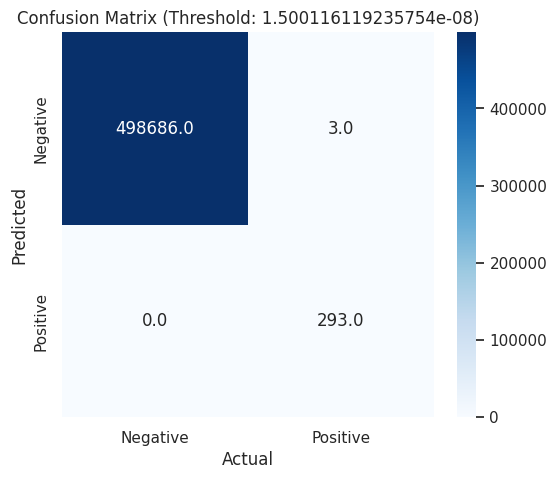

In [96]:
strict_train_98 = 'strict_98_train.data'
strict_opt_th_98 = find_optimal_threshold(strict_train_98)
evaluate_thresholds(strict_train_98, strict_opt_th_98)

Reading data from file...
Data reading completed.

Computing final metrics with the threshold...

Final results:
Threshold: 1.500116119235754e-08
Accuracy: 1.0000
MCC: 0.9933
TPR (Recall): 1.0000
PPV (Precision): 0.9867
F1 Score: 0.9933

IDs of False Negatives: 
IDs of False Positives: P84555

Plotting the confusion matrix...


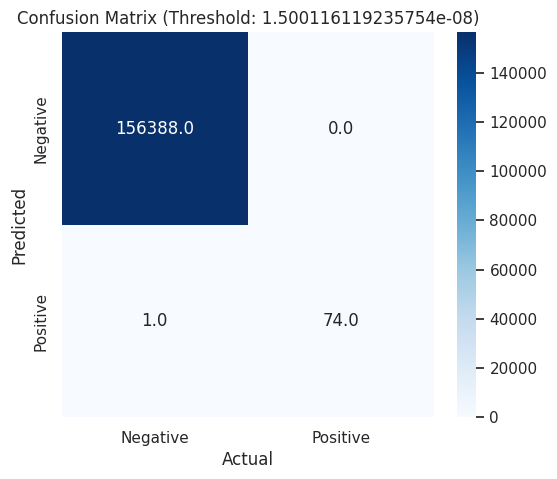

In [97]:
strict_test_98 = 'strict_98_test.data'
evaluate_thresholds(strict_test_98, strict_opt_th_98)

Threshold 0.50000000005: F1 Score = 0.0066
Threshold 0.250000000075: F1 Score = 0.0118
Threshold 0.1250000000875: F1 Score = 0.0227
Threshold 0.06250000009375001: F1 Score = 0.0435
Threshold 0.031250000096875: F1 Score = 0.0843
Threshold 0.0156250000984375: F1 Score = 0.1621
Threshold 0.007812500099218751: F1 Score = 0.2798
Threshold 0.0039062500996093754: F1 Score = 0.4596
Threshold 0.0019531250998046875: F1 Score = 0.6321
Threshold 0.0009765625999023438: F1 Score = 0.7706
Threshold 0.0004882813499511719: F1 Score = 0.8618
Threshold 0.00024414072497558597: F1 Score = 0.9003
Threshold 0.00012207041248779297: F1 Score = 0.9193
Threshold 6.103525624389649e-05: F1 Score = 0.9408
Threshold 3.051767812194824e-05: F1 Score = 0.9510
Threshold 1.525888906097412e-05: F1 Score = 0.9597
Threshold 7.62949453048706e-06: F1 Score = 0.9686
Threshold 3.8147972652435305e-06: F1 Score = 0.9813
Threshold 1.9074486326217653e-06: F1 Score = 0.9849
Threshold 9.537743163108826e-07: F1 Score = 0.9868
Threshol

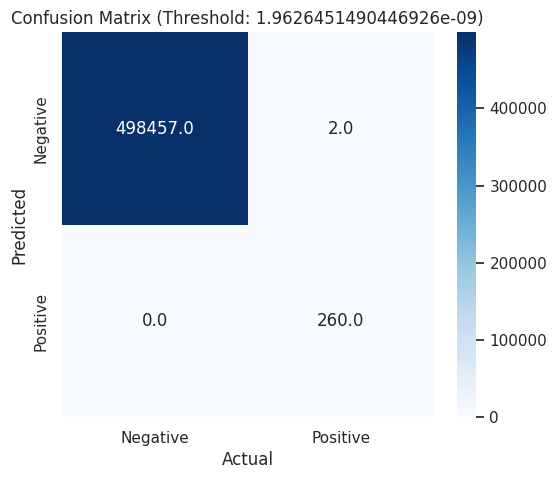

In [98]:
strict_train_80 = 'strict_80_train.data'
strict_opt_th_80 = find_optimal_threshold(strict_train_80)
evaluate_thresholds(strict_train_80, strict_opt_th_80)

Reading data from file...
Data reading completed.

Computing final metrics with the threshold...

Final results:
Threshold: 1.9626451490446926e-09
Accuracy: 1.0000
MCC: 0.9924
TPR (Recall): 0.9848
PPV (Precision): 1.0000
F1 Score: 0.9924

IDs of False Negatives: P86963
IDs of False Positives: 

Plotting the confusion matrix...


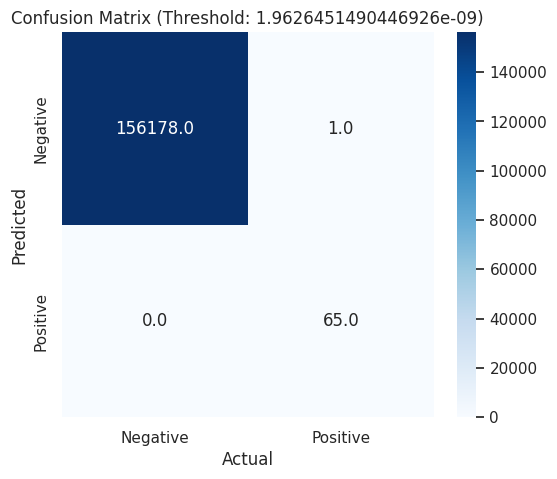

In [99]:
strict_test_80 = 'strict_80_test.data'
evaluate_thresholds(strict_test_80, strict_opt_th_80)

Threshold 0.50000000005: F1 Score = 0.0069
Threshold 0.250000000075: F1 Score = 0.0118
Threshold 0.1250000000875: F1 Score = 0.0221
Threshold 0.06250000009375001: F1 Score = 0.0428
Threshold 0.031250000096875: F1 Score = 0.0859
Threshold 0.0156250000984375: F1 Score = 0.1642
Threshold 0.007812500099218751: F1 Score = 0.2778
Threshold 0.0039062500996093754: F1 Score = 0.4465
Threshold 0.0019531250998046875: F1 Score = 0.6332
Threshold 0.0009765625999023438: F1 Score = 0.7692
Threshold 0.0004882813499511719: F1 Score = 0.8369
Threshold 0.00024414072497558597: F1 Score = 0.9034
Threshold 0.00012207041248779297: F1 Score = 0.9310
Threshold 6.103525624389649e-05: F1 Score = 0.9493
Threshold 3.051767812194824e-05: F1 Score = 0.9571
Threshold 1.525888906097412e-05: F1 Score = 0.9715
Threshold 7.62949453048706e-06: F1 Score = 0.9731
Threshold 3.8147972652435305e-06: F1 Score = 0.9813
Threshold 1.9074486326217653e-06: F1 Score = 0.9829
Threshold 9.537743163108826e-07: F1 Score = 0.9846
Threshol

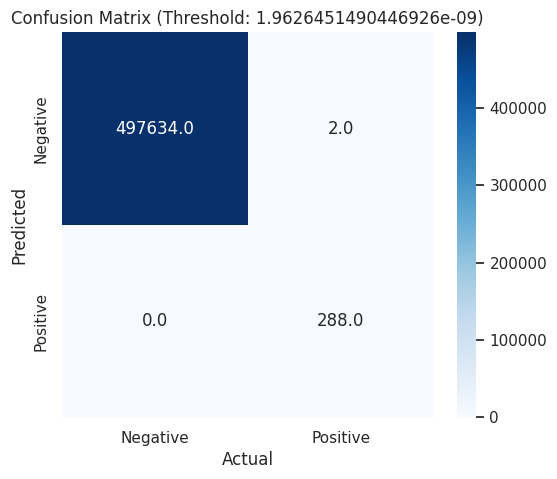

In [100]:
not_strict_train_98 = 'not_strict_98_train.data'
not_strict_opt_th_98 = find_optimal_threshold(not_strict_train_98)
evaluate_thresholds(not_strict_train_98, not_strict_opt_th_98)

Reading data from file...
Data reading completed.

Computing final metrics with the threshold...

Final results:
Threshold: 1.9626451490446926e-09
Accuracy: 1.0000
MCC: 0.9931
TPR (Recall): 0.9863
PPV (Precision): 1.0000
F1 Score: 0.9931

IDs of False Negatives: O62247
IDs of False Positives: 

Plotting the confusion matrix...


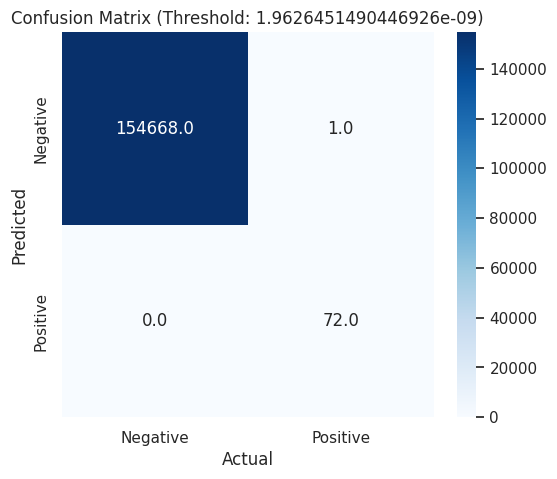

In [101]:
not_strict_test_98 = 'not_strict_98_test.data'
evaluate_thresholds(not_strict_test_98, not_strict_opt_th_98)

Threshold 0.50000000005: F1 Score = 0.0061
Threshold 0.250000000075: F1 Score = 0.0104
Threshold 0.1250000000875: F1 Score = 0.0196
Threshold 0.06250000009375001: F1 Score = 0.0377
Threshold 0.031250000096875: F1 Score = 0.0757
Threshold 0.0156250000984375: F1 Score = 0.1457
Threshold 0.007812500099218751: F1 Score = 0.2495
Threshold 0.0039062500996093754: F1 Score = 0.4170
Threshold 0.0019531250998046875: F1 Score = 0.6036
Threshold 0.0009765625999023438: F1 Score = 0.7578
Threshold 0.0004882813499511719: F1 Score = 0.8239
Threshold 0.00024414072497558597: F1 Score = 0.8947
Threshold 0.00012207041248779297: F1 Score = 0.9239
Threshold 6.103525624389649e-05: F1 Score = 0.9444
Threshold 3.051767812194824e-05: F1 Score = 0.9533
Threshold 1.525888906097412e-05: F1 Score = 0.9714
Threshold 7.62949453048706e-06: F1 Score = 0.9713
Threshold 3.8147972652435305e-06: F1 Score = 0.9845
Threshold 1.9074486326217653e-06: F1 Score = 0.9883
Threshold 9.537743163108826e-07: F1 Score = 0.9903
Threshol

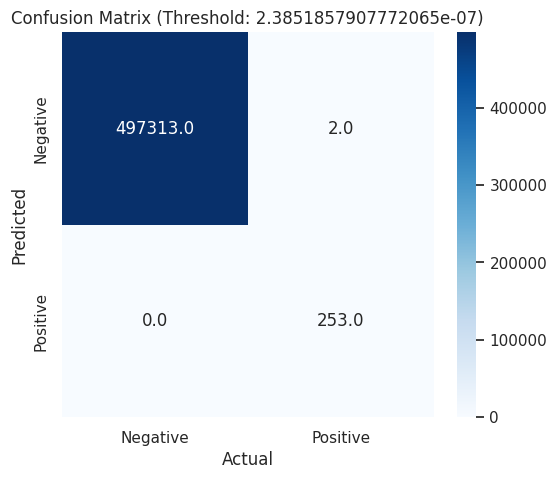

In [102]:
not_strict_train_80 = 'not_strict_80_train.data'
not_strict_opt_th_80 = find_optimal_threshold(not_strict_train_80)
evaluate_thresholds(not_strict_train_80, not_strict_opt_th_80)

Reading data from file...
Data reading completed.

Computing final metrics with the threshold...

Final results:
Threshold: 2.3851857907772065e-07
Accuracy: 1.0000
MCC: 0.9693
TPR (Recall): 0.9844
PPV (Precision): 0.9545
F1 Score: 0.9692

IDs of False Negatives: Q8WPG5
IDs of False Positives: P84555, P0DJ63, P83605

Plotting the confusion matrix...


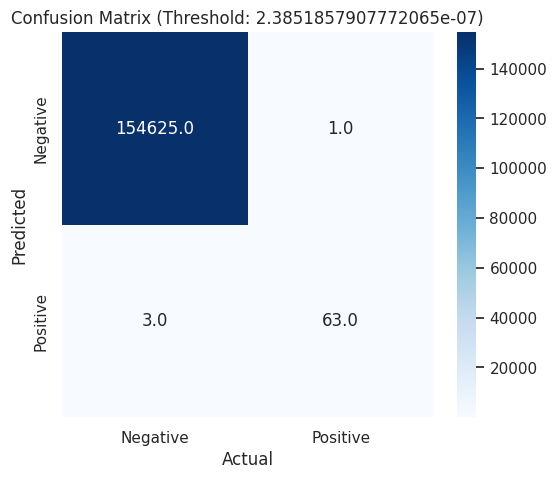

In [103]:
not_strict_test_80 = 'not_strict_80_test.data'
evaluate_thresholds(not_strict_test_80, not_strict_opt_th_80)

# Discussion

Upon reviewing the UniProt IDs for false positives (FPs) and false negatives (FNs), it was noted that all had an annotation score below 4, except for one from the less strict dataset, which had a score of 5. This particular ID seems to be the only genuinely erroneous data that also boasts a high annotation score. This observation suggests that implementing stricter criteria for selecting proteins with Kunitz domains for structural and sequence alignment could enhance our final results. The analysis reveals that the less strict dataset with a threshold of 80 was the least effective for training our model, likely due to the inclusion of numerous low-quality proteins, which degraded model performance. In contrast, the other three datasets—strict_98, strict_80, and less strict_98—showed similar performances. The noteworthy difference was that in the less strict_98 dataset, the misclassified protein was O62247, which had a high annotation score of 5, whereas in the strict_98 and strict_80 datasets, the misclassifications involved proteins with low annotation scores. This pattern reinforces the benefit of stricter selection criteria for protein datasets, potentially resulting in fewer proteins but significantly better performance overall.